# Лабораторная работа №2: Бинарный поиск

Лабораторная работа состоит из 9 задач. Для каждой задачи вы должны дать: \
1) код, где первый комментарий - асимптотическая сложность алгоритма (по времени и по памяти!) \

2) скрин с окнутой задачей из тестирующей системы\

3) ВАШЕ (не гпт) описание работы (так называемая, интуиция / идея решения).

Задача засчитывается, если три пункта выполнены честно.

Если вдруг, обнаружится плагиат / гпт решения - аннулируется задача без возможности апелляции.

**DEADLine - 06.03.2025**

# Приступим


## Задача Уравнение ([ссылка](https://codeforces.com/edu/course/2/lesson/6/2/practice/contest/283932/problem/E)) [1.5 балла]


Найдите такое число $x$, что $x^2 + \sqrt{x} = c$

### Входные данные  
В единственной строке содержится вещественное число $C$ $(1.0 \leq C \leq 10^{10})$.

### Выходные данные  
Выведите одно число — искомый $x$. Ответ будет признан верным, если относительная или абсолютная погрешность не более $10^{-6}$.

### Примеры  

#### Входные данные  

2.0

#### Выходные данные  

1.0

#### Входные данные  

15.6

#### Выходные данные  

3.698232168829691



In [ ]:


# Асимптотическая сложность по времени - О(log) делям пополам
# Асимптотическая сложность по памяти - O(1) не создаем масивово и тд

# ВАШ КОД

from math import pow

c = float(input())

low = 0.0
high = c
epsilon = 1e-6

while high - low > epsilon:
    mid = (low + high) / 2
    f_mid = pow(mid, 2) + pow(mid, 0.5)

    if f_mid > c:
        high = mid
    else:
        low = mid


print(f"{low:.10f}")


### ВАША интуиция
Тут просто реализовал класический метод деления отрезка пополам, хотя заменной можно превести к упрощеному квадратному уравнению и его быстро решить, так же численный метод с заменой оже бы сработал, но там пришлось бы повозится с отрицательными числами

### ВАШ скрин ОКнутой задачи
### ВАШ скрин ОКнутой задачи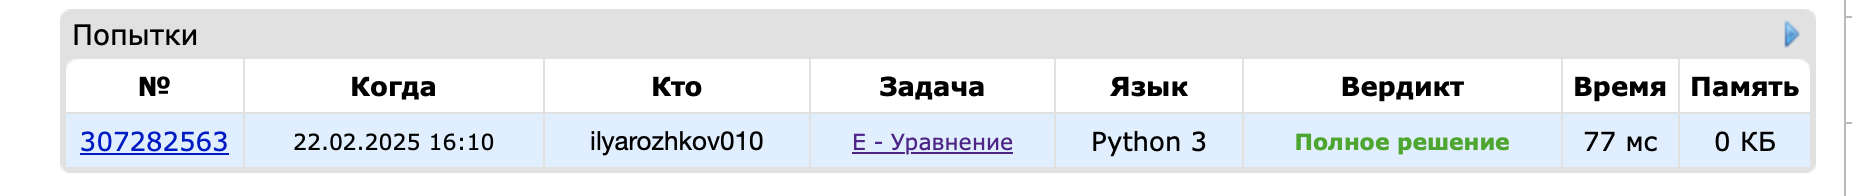

## Задача Максимальное вычеркивание ([ссылка](https://codeforces.com/edu/course/2/lesson/6/2/practice/contest/283932/problem/F)) [1.5 балла]

Петя хочет получить слово $p$ из слова $t$, вычеркивая буквы в заданном порядке. После каждого удаления нумерация оставшихся букв не меняется.

Вася, его брат, хочет остановить Петра как можно позже, но до того момента, когда слово $p$ станет недостижимым. Ваша задача — найти максимальное количество букв, которые может удалить Петя, прежде чем Вася его остановит.

### Входные данные  
- Первая строка содержит строку $t$ $(1 \leq |p| < |t| \leq 200000)$.
- Вторая строка содержит строку $p$.
- Третья строка содержит перестановку $a_1, a_2, \dots, a_{|t|}$ — порядок, в котором Петя вычеркивает буквы ($1 \leq a_i \leq |t|$, все $a_i$ различны).

### Выходные данные  
Выведите одно число — максимальное число букв, которые может вычеркнуть Петя.

### Примеры  

#### Входные данные  
```
ababcba
abb
5 3 4 1 7 6 2
```
#### Выходные данные  
```
3
```

In [1]:
# Асимптотическая сложность по времени - О(t log(t))
# Асимптотическая сложность по памяти - O(t)

def can_form_p(m, t, p, perm):
    # массив удалённых букв
    deleted = [False] * len(t)

    # буквы будут удалены
    for i in range(m):
        deleted[perm[i] - 1] = True

    j = 0

    for i in range(len(t)):
        if not deleted[i] and t[i] == p[j]:
            j += 1
            if j == len(p):
                return True

    return False

def max_deletions(t, p, perm):
    low, high = 0, len(t)

    # бинарный поиск по количеству удалений
    while low < high:
        mid = (low + high + 1) // 2
        if can_form_p(mid, t, p, perm):
            low = mid
        else:
            high = mid - 1

    return low


t = input().strip()
p = input().strip()
perm = list(map(int, input().split()))

print(max_deletions(t, p, perm))

# ВАШ КОД



2
1.0000000000


### ВАША интуиция

Сделаем бинарный поиск по количеству удалений чтобы найти максимальное количесвто букв которые может удалить петя

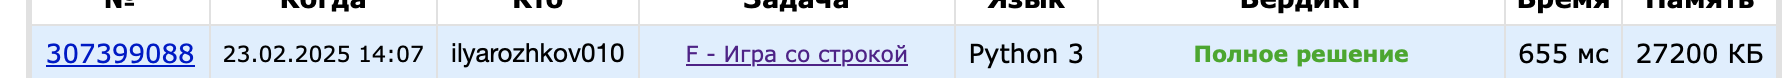

## Задача Студенческие советы ([ссылка](https://codeforces.com/edu/course/2/lesson/6/2/practice/contest/283932/problem/G)) [0.25 балла]

Задано число $k$. Каждый студенческий совет должен состоять из $k$ студентов, причем все студенты в совете должны быть из разных групп. Один студент может входить не более чем в один совет (некоторые студенты могут не входить ни в один совет).

Дан массив $a[1..n]$, где $a[i]$ — количество студентов в $i$-й группе. Требуется найти максимальное число советов, которые можно составить.

### Входные данные  
- Первая строка содержит число $k$ $(2 \leq k \leq 20)$ — количество студентов в одном совете.  
- Вторая строка содержит число $n$ $(k \leq n \leq 50)$ — количество групп.  
- Далее следует $n$ чисел $a[1], a[2], \dots, a[n]$ $(1 \leq a[i] \leq 10^9)$ — количество студентов в каждой группе.

### Выходные данные  
Выведите одно число — максимальное количество студенческих советов.

### Примеры  

#### Входные данные  
```
3
5
4
4
4
4
4
```
#### Выходные данные  
```
6
```

#### Входные данные  
```
4
6
1
2
3
4
5
6
```
#### Выходные данные  
```
5
```

In [ ]:
# Асимптотическая сложность по времени - О(n log(n)) на сортировку и n бинарных поисков
# Асимптотическая сложность по памяти - O(n)

# ВАШ КОД

def can_form_councils(m, k, groups):
    required_students = m * k  # всего нужно студентов для m советов
    available = 0

    # сколько студентов можно выбрать из каждой группы
    for students in groups:
        available += min(students, m)

    return available >= required_students

def max_councils(k, groups):
    groups.sort(reverse=True)

    # границы для бинарного поиска
    low, high = 0, sum(groups) // k

    # бинарный поиск по количеству советов
    while low < high:
        mid = (low + high + 1) // 2
        if can_form_councils(mid, k, groups):
            low = mid
        else:
            high = mid - 1

    return low


k = int(input())
n = int(input())
groups = []

for _ in range(n):
    groups.append(int(input()))

print(max_councils(k, groups))



### ВАША интуиция


сделать сортироку и банрный поиск

### ВАШ скрин ОКнутой задачи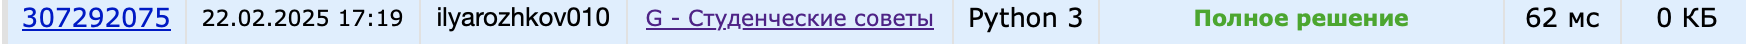

## Задача Гамбургеры ([ссылка](https://codeforces.com/edu/course/2/lesson/6/2/practice/contest/283932/problem/H)) [0.25 балла]

Поликарп любит готовить гамбургеры, используя только три ингредиента: **хлеб (B)**, **колбасу (S)** и **сыр (C)**. Рецепт гамбургера записан в виде строки, где символы указывают порядок ингредиентов снизу вверх.

На кухне у Поликарпа есть ограниченное количество ингредиентов, но он может докупить их в магазине за определенную цену. Задача — определить, сколько гамбургеров он сможет приготовить, потратив не более чем $r$ рублей.

### Входные данные  
- **Первая строка** — непустая строка длиной до $100$, описывающая рецепт гамбургера ('B', 'S', 'C').  
- **Вторая строка** — три целых числа $n_b, n_s, n_c$ $(1 \leq n_b, n_s, n_c \leq 100)$ — количество хлеба, колбасы и сыра на кухне.  
- **Третья строка** — три целых числа $p_b, p_s, p_c$ $(1 \leq p_b, p_s, p_c \leq 100)$ — стоимость одного кусочка хлеба, колбасы и сыра в магазине.  
- **Четвертая строка** — одно целое число $r$ $(1 \leq r \leq 10^{12})$ — количество рублей у Поликарпа.

### Выходные данные  
Выведите одно число — наибольшее количество гамбургеров, которое Поликарп может приготовить. Если не удастся приготовить ни одного гамбургера, выведите `0`.

### Примеры  

#### Входные данные  
```
BBBSSC
6 4 1
1 2 3
4
```
#### Выходные данные  
```
2
```

#### Входные данные  
```
BBC
1 10 1
1 10 1
21
```
#### Выходные данные  
```
7
```

#### Входные данные  
```
BSC
1 1 1
1 1 3
1000000000000
```
#### Выходные данные  
```
200000000001
```

In [ ]:
# Асимптотическая сложность по времени - О(log n), хотя теоритеску можно подвести под O(1), так как в коде low, high = 0, 10**13
# Асимптотическая сложность по памяти - O(1)

# ВАШ КОД

def can_make_hamburgers(count, recipe, available, prices, money):
    # сколько нужно купить ингредиентов
    total_cost = 0

    need_b = max(0, recipe['B'] * count - available['B'])
    total_cost += need_b * prices['B']


    need_s = max(0, recipe['S'] * count - available['S'])
    total_cost += need_s * prices['S']

    need_c = max(0, recipe['C'] * count - available['C'])
    total_cost += need_c * prices['C']

    # хватит ли денег
    return total_cost <= money

def max_hamburgers(recipe_str, available, prices, money):
    # подсчёт ингредиентов в рецепте
    recipe = {'B': 0, 'S': 0, 'C': 0}
    for char in recipe_str:
        recipe[char] += 1

    # бинарный поиск по количеству гамбургеров
    low, high = 0, 10**13

    while low < high:
        mid = (low + high + 1) // 2
        if can_make_hamburgers(mid, recipe, available, prices, money):
            low = mid
        else:
            high = mid - 1

    return low

recipe_str = input().strip()
nb, ns, nc = map(int, input().split())
pb, ps, pc = map(int, input().split())
r = int(input())

available = {'B': nb, 'S': ns, 'C': nc}
prices = {'B': pb, 'S': ps, 'C': pc}

print(max_hamburgers(recipe_str, available, prices, r))



### ВАША интуиция!

здача решается по бинарному поиску по количеству еству гамбургеров

### ВАШ скрин ОКнутой задачи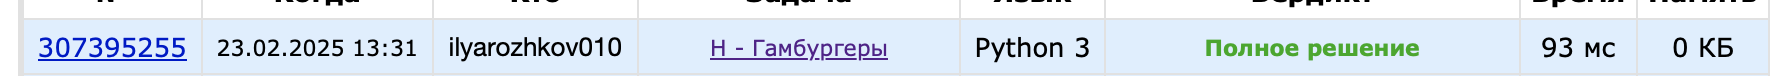

## Задача Собраться вместе ([ссылка](https://codeforces.com/edu/course/2/lesson/6/3/practice/contest/285083/problem/A)) [0.25 балла]

На прямой расположены $n$ человек. Каждый человек находится в некоторой точке $x_i$ и может двигаться со скоростью $v_i$. Им нужно собраться в одной точке как можно быстрее. Требуется определить минимальное время, за которое они могут этого добиться.  

### Входные данные  
- **Первая строка** содержит одно целое число $n$ $(1 \leq n \leq 10^5)$ — количество людей.  
- **Следующие $n$ строк** содержат по два целых числа $x_i$ и $v_i$ $(-10^9 \leq x_i \leq 10^9, 1 \leq v_i \leq 10^9)$ — начальное положение человека и его скорость.  

### Выходные данные  
Выведите одно число — минимальное время, за которое все люди могут собраться в одной точке. Ответ будет считаться верным, если относительная или абсолютная погрешность не превышает $10^{-6}$.  

### Примеры  

#### Входные данные  
```
5
-1 5
10 3
4 2
7 10
8 1
```
#### Выходные данные  
```
1.5
```

In [1]:
# Асимптотическая сложность по времени - О(n log)
# Асимптотическая сложность по памяти - O(n)

def time_to_meet(P, positions, speeds):
    times = []
    for i in range(len(positions)):
        times.append(abs(positions[i] - P) / speeds[i])
    return max(times)

def find_min_time(positions, speeds):
    # границы для тернарного поиска
    L, R = min(positions), max(positions)
    epsilon = 1e-7

    # тернарный поиск
    while R - L > epsilon:
        m1 = L + (R - L) / 3
        m2 = R - (R - L) / 3

        if time_to_meet(m1, positions, speeds) > time_to_meet(m2, positions, speeds):
            L = m1
        else:
            R = m2

    # минимальное время для финальной точки
    return time_to_meet(L, positions, speeds)


n = int(input())
positions = []
speeds = []

for _ in range(n):
    x, v = map(int, input().split())
    positions.append(x)
    speeds.append(v)

print(f"{find_min_time(positions, speeds)}")


### ВАША интуиция

Тут лучше сделать тернарный поиск (делить на 3 части), а не бинарный, чтобы быстрее найти время

### ВАШ скрин ОКнутой задачи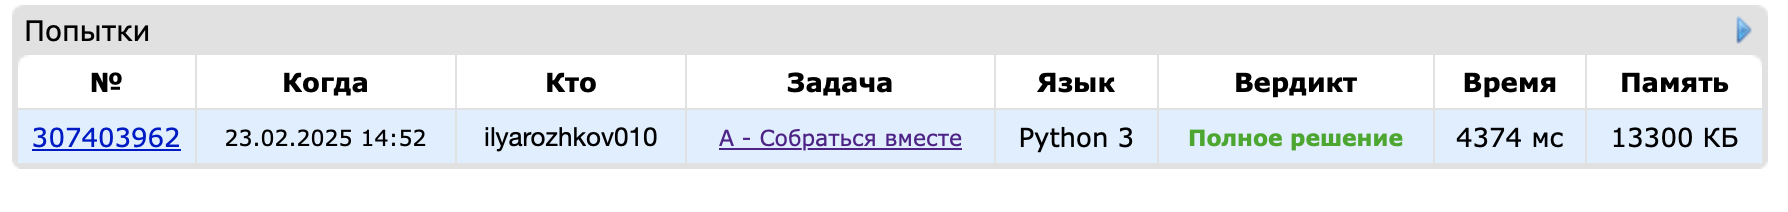

## Задача Максимальный средний отрезок ([ссылка](https://codeforces.com/edu/course/2/lesson/6/4/practice/contest/285069/problem/A)) [0.25 балла]

Дан массив из $n$ чисел и число $d$. Необходимо найти такой отрезок массива длины не менее $d$, на котором среднее арифметическое элементов максимально.  

### Входные данные  
- **Первая строка** содержит два целых числа $n$ и $d$ $(1 \leq d \leq n \leq 10^5)$ — длина массива и минимальная длина отрезка.  
- **Вторая строка** содержит $n$ целых чисел $a_i$ $(0 \leq a_i \leq 100)$ — элементы массива.  

### Выходные данные  
Выведите два числа — номера первого и последнего элемента найденного отрезка (нумерация с $1$).  

### Примеры  

#### Входные данные  
```
6 2
3 1 8 5 7 2
```  
#### Выходные данные  
```
3 5
```

In [ ]:
# Асимптотическая сложность по времени - О(n log)
# Асимптотическая сложность по памяти - O(n))

# ВАШ КОД

def can_find_segment(mid, n, d, array):
    # префиксные суммы после вычитания mid
    prefix = [0] * (n + 1)

    for i in range(1, n + 1):
        prefix[i] = prefix[i - 1] + (array[i - 1] - mid)

    # Минимальное значение префиксной суммы до текущей позиции
    min_prefix = 0
    start_index = 0

    best_i, best_j = -1, -1

    # проверяем, существует ли отрезок длины >= d с неотрицательной суммой
    for j in range(d, n + 1):
        if prefix[j] - min_prefix >= 0:
            best_i = start_index + 1
            best_j = j
            return True, best_i, best_j

        # обновляем минимальную префиксную сумму
        if prefix[j - d + 1] < min_prefix:
            min_prefix = prefix[j - d + 1]
            start_index = j - d + 1

    return False, -1, -1

def max_average_segment(n, d, array):
    low, high = 0, 100
    epsilon = 1e-7

    best_i, best_j = 1, d

    while high - low > epsilon:
        mid = (low + high) / 2

        found, i, j = can_find_segment(mid, n, d, array)

        if found:
            low = mid
            best_i, best_j = i, j
        else:
            high = mid

    return best_i, best_j


n, d = map(int, input().split())
array = list(map(int, input().split()))


i, j = max_average_segment(n, d, array)
print(i, j)


### ВАША интуиция

Тут нужно обеденить бинарный поиск и префиксную сумму чтобы быстро считать среднее

### ВАШ скрин ОКнутой задачи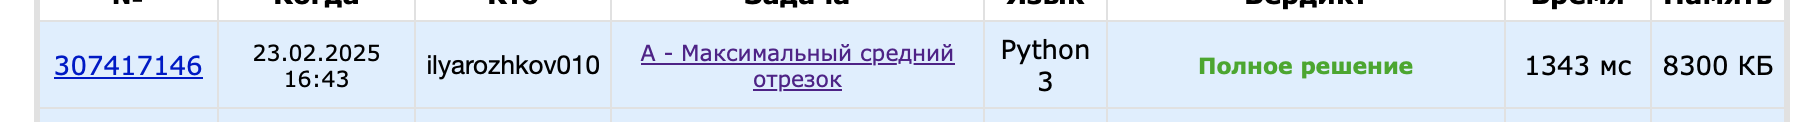

## Задача: Выбор пар ([ссылка](https://codeforces.com/edu/course/2/lesson/6/4/practice/contest/285069/problem/C)) [1/3 балла]

Дано $n$ пар положительных целых чисел $(a_1, b_1), (a_2, b_2), \dots, (a_n, b_n)$. Требуется выбрать $k$ из них $(1 \leq k \leq n)$ так, чтобы отношение  

$\frac{a_{i_1} + a_{i_2} + \dots + a_{i_k}}{b_{i_1} + b_{i_2} + \dots + b_{i_k}}$

было максимальным возможным.  

### Входные данные  
- **Первая строка** содержит два целых числа $n$ и $k$ $(1 \leq k \leq n \leq 10^5)$ — количество пар и количество пар, которые нужно выбрать.  
- **Следующие $n$ строк** содержат по два целых числа $a_i, b_i$ $(1 \leq a_i, b_i \leq 10^5)$ — значения каждой пары.  

### Выходные данные  
Выведите искомое максимальное отношение. Ответ будет считаться верным, если относительная или абсолютная погрешность не превышает $10^{-6}$.  

### Примеры  

#### Входные данные  
```
3 2
10 3
9 5
7 4
```  
#### Выходные данные  
```
2.4285714286
```  

#### Входные данные  
```
8 3
4 2
4 2
2 2
1 5
5 3
3 5
2 2
5 3
```  
#### Выходные данные  
```
1.8571428571
```

In [ ]:
# Асимптотическая сложность по времени - О(n logn) сортировка и бинарный поиск
# Асимптотическая сложность по памяти - O(n)
def can_achieve_ratio(x, n, k, pairs):
    values = []
    for a, b in pairs:
        values.append(a - x * b)

    values.sort(reverse=True)

    # проверяем сумму первых k значений
    return sum(values[:k]) >= 0

def max_average_ratio(n, k, pairs):
    low, high = 0, 1e6
    epsilon = 1e-7

    # бинарный поиск по среднему значению
    while high - low > epsilon:
        mid = (low + high) / 2

        if can_achieve_ratio(mid, n, k, pairs):
            low = mid
        else:
            high = mid

    return low

n, k = map(int, input().split())
pairs = []

for _ in range(n):
    a, b = map(int, input().split())
    pairs.append((a, b))


print(max_average_ratio(n, k, pairs))



# ВАШ КОД

### ВАША интуиция

отсортируем и найдем оптимальную комбинацию через бинарный поиск

### ВАШ скрин ОКнутой задачи

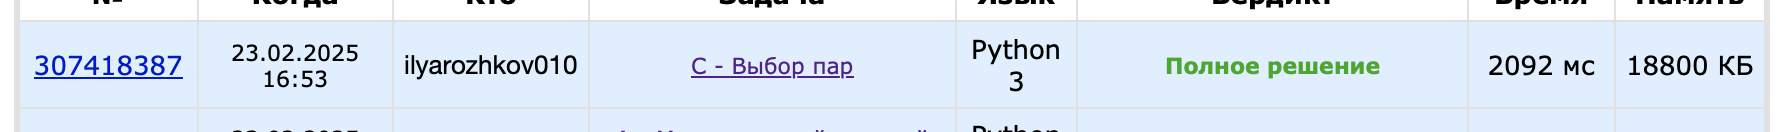

## Задача: Таблица умножения ([ссылка](https://codeforces.com/edu/course/2/lesson/6/5/practice/contest/285084/problem/B)) [1/3 балла]  

Петя составил таблицу умножения размером $n \times n$. Ячейка в $i$-й строке и $j$-м столбце содержит значение $i \cdot j$. Петю интересует, какое число в таблице является $k$-м по возрастанию. Помогите ему найти ответ.  

### Входные данные  
- **Одна строка** содержит два целых числа $n$ и $k$ $(1 \leq n \leq 10^5, 1 \leq k \leq n^2)$.  

### Выходные данные  
Выведите одно число — $k$-е число по возрастанию в таблице.  

### Примеры  

#### Входные данные  
```
3 4
```  
#### Выходные данные  
```
3
```  

#### Входные данные  
```
5 16
```  
#### Выходные данные  
```
10
```

In [ ]:
# Асимптотическая сложность по времени - О(n log n)
# Асимптотическая сложность по памяти - O(1 (так как можно хранить только переменные для подсчета ))

# ВАШ КОД

def count_less_equal(mid, n):
    count = 0

    # количество чисел <= mid
    for i in range(1, n + 1):
        count += min(n, mid // i)

    return count

def find_kth_number(n, k):
    low, high = 1, n * n

    # бинарный поиск по значению
    while low < high:
        mid = (low + high) // 2

        # количество чисел <= mid
        if count_less_equal(mid, n) < k:
            low = mid + 1
        else:
            high = mid

    return low


n, k = map(int, input().split())


print(find_kth_number(n, k))


### ВАША интуиция

Самое просто решение просто сделать бинарный поиск по таблице, хотя может с помошью аналитической математики можно было бы решить быстрее, но регить полиминальные уровнения больше 4 степени не возможно (аналитически), так что не факт что получится

### ВАШ скрин ОКнутой задачи

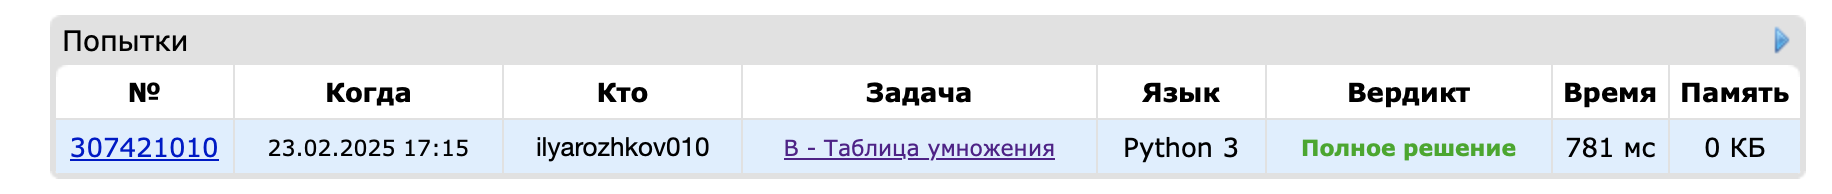


## K-я сумма ([ссылка](https://codeforces.com/edu/course/2/lesson/6/5/practice/contest/285084/problem/C)) [1/3 балла]

Есть два массива 𝑎 и 𝑏, каждый из которых состоит из 𝑛 чисел. Для каждой пары чисел (𝑖,𝑗): 1 ≤ 𝑖,𝑗 ≤ 𝑛 выпишем сумму чисел 𝑎𝑖 + 𝑏𝑗. Найдите в полученном множестве сумм 𝑘-ю по возрастанию.

### Входные данные  
Первая строка содержит целые числа 𝑛 и 𝑘 (1 ≤ 𝑛 ≤ 10^5, 1 ≤ 𝑘 ≤ 𝑛^2). Вторая строка содержит элементы массива 𝑎, третья строка содержит элементы массива 𝑏. Все элементы массивов — целые положительные числа, не больше 10^9.

### Выходные данные  
Выведите одно число — искомую 𝑘-ю сумму.

### Пример  

#### Входные данные  
```
5 10
4 2 6 4 8
7 3 1 9 5
```  

#### Выходные данные  
```
9
```  

In [ ]:
# Асимптотическая сложность по времени - О(n log n)
# Асимптотическая сложность по памяти - O(n)


from bisect import bisect_right

def count_sums_less_equal(mid, a, b, n):
    count = 0

    for x in a:
        count += bisect_right(b, mid - x)

    return count

def find_kth_sum(n, k, a, b):
    b.sort()

    low = min(a) + min(b)
    high = max(a) + max(b)

    # бинарный поиск по значению суммы
    while low < high:
        mid = (low + high) // 2

        # подсчитываем количество сумм <= mid
        if count_sums_less_equal(mid, a, b, n) < k:
            low = mid + 1
        else:
            high = mid

    return low

n, k = map(int, input().split())
a = list(map(int, input().split()))
b = list(map(int, input().split()))

print(find_kth_sum(n, k, a, b))



Очевидное решине отсортировать и сделать бинарный поиск, но кажется что может было бы возможно обеденить их чтобы константа была лучше, может в пару раз было бы быстрее

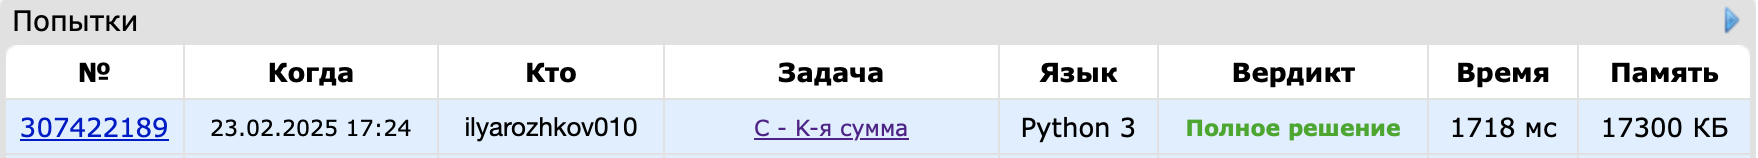